In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error


In [ ]:
df_energy = pd.read_csv('../data/World Energy Consumption.csv')

df_co = pd.read_csv('../data/co2_greenHouseGas_Emissions.csv')


In [ ]:
print(df_energy.head())
print('\n')
print(df_co.info())
print('\n')
print(df_energy.head())
print(df_co.head())


df_energy.drop_duplicates(inplace=True)
df_co.drop_duplicates(inplace=True)

         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0      

# DATASET EXPLORATION

In [ ]:

df_en = df_energy.pivot_table(index='country',
                           values=['carbon_intensity_elec','coal_electricity',
                          'coal_share_elec','electricity_demand','electricity_generation',
                            'gas_electricity','greenhouse_gas_emissions','low_carbon_electricity',
                                   'low_carbon_share_elec','oil_electricity','oil_share_elec'],

                           aggfunc= "mean"
                           )
df_en = df_en.reset_index()

df_co.rename(columns={'Region':'country'},inplace= True)

# DATA PREPROCESSING

In [ ]:
df_join = pd.merge(df_en, df_co, on='country', how='inner')

print(df_join.shape)

df_join.dropna(inplace=True)
df_join.drop_duplicates(inplace=True)
print(df_join.info())

# 1️⃣ Define the conversion function
def convert_to_number(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip()  # remove commas and spaces
        if x.endswith('K'):
            return float(x[:-1]) * 1_000
        elif x.endswith('M'):
            return float(x[:-1]) * 1_000_000
        elif x.endswith('B'):
            return float(x[:-1]) * 1_000_000_000
        else:
            return float(x)
    return x  # if it's already a number

# 2️⃣ Apply the function to the column
df_join['CO2 Emissions (Mt)'] = df_join['CO2 Emissions (Mt)'].apply(convert_to_number)

# 3️⃣ Check the result
print(df_join['CO2 Emissions (Mt)'].head())
print(df_join.dtypes)


df_join['CO2 Emissions (Mt)'] = df_join['CO2 Emissions (Mt)'].astype(float)
print(df_join.head())



(195, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 194
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        173 non-null    object 
 1   carbon_intensity_elec          173 non-null    float64
 2   coal_electricity               173 non-null    float64
 3   coal_share_elec                173 non-null    float64
 4   electricity_demand             173 non-null    float64
 5   electricity_generation         173 non-null    float64
 6   gas_electricity                173 non-null    float64
 7   greenhouse_gas_emissions       173 non-null    float64
 8   low_carbon_electricity         173 non-null    float64
 9   low_carbon_share_elec          173 non-null    float64
 10  oil_electricity                173 non-null    float64
 11  oil_share_elec                 173 non-null    float64
 12  CO2 Emissions (Mt)             173 non-null  

# VISUALIZING THE DATASET

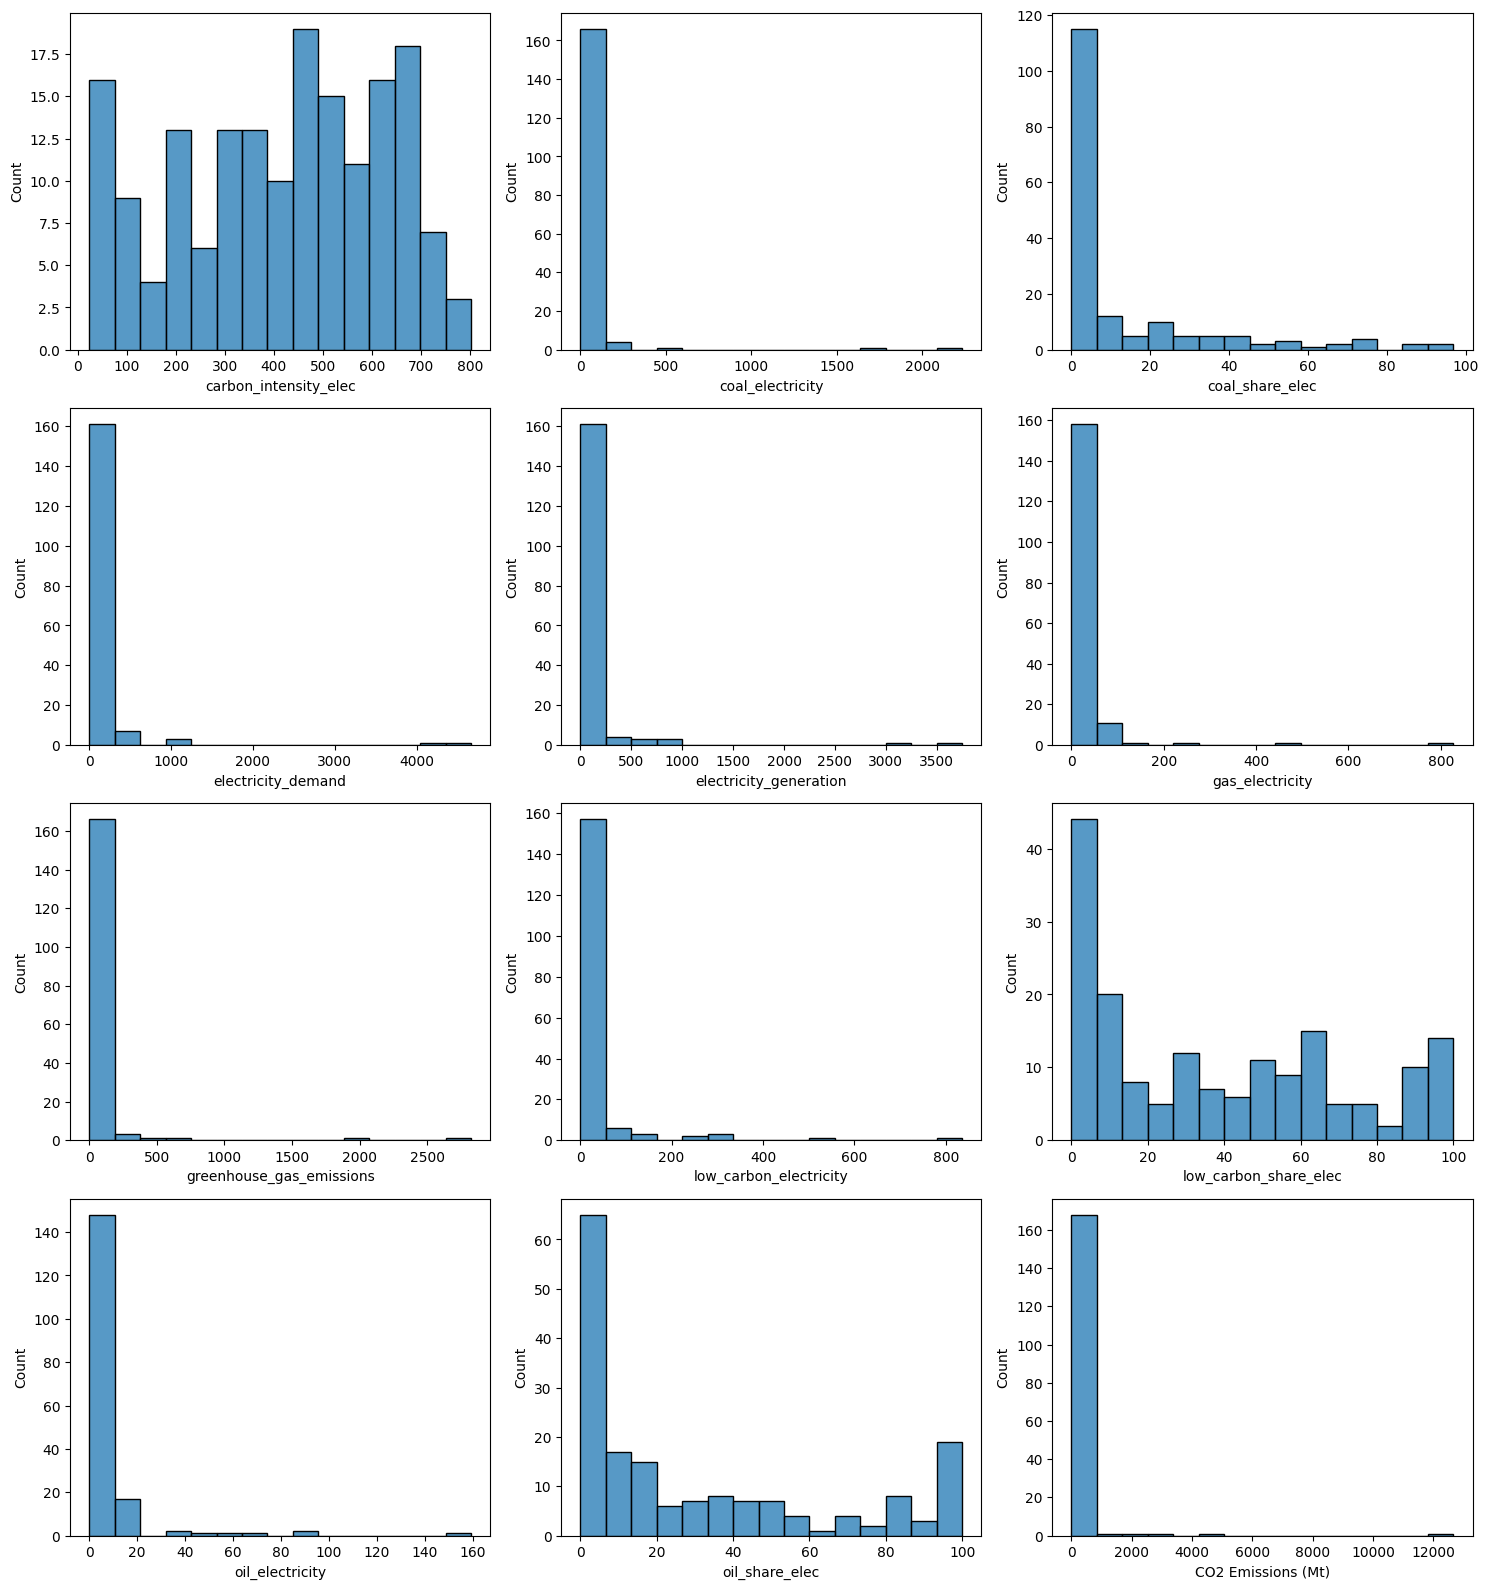

In [ ]:
import math

df_num = df_join.select_dtypes(include=['float64','int64'])
num_var = df_num.columns.tolist()
num_plots = len(num_var)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(15, rows*4))
for i, x in enumerate(num_var):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df_num[x], bins=15)
plt.tight_layout()
plt.show()


In [ ]:
X= df_num.drop('CO2 Emissions (Mt)',axis=1)
y= df_num['CO2 Emissions (Mt)']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)

(138, 11)


# BUILDING  THE REGRESSION MODELS

In [ ]:
model_data = []

model_dictionary = {
    'linear Model':LinearRegression(),
    'Lasso':Lasso(alpha=0.01),

    'Ridge':Ridge(alpha=0.01),

    'Decision Tree':DecisionTreeRegressor(max_features=4,
                                          max_depth=2,random_state=42,
                                          min_samples_split=3,min_samples_leaf=6),

    'RandomForest':RandomForestRegressor(n_estimators=1000,random_state=42,
                                         max_depth=3,min_samples_split=3,max_features='sqrt'),
    'GradientBoost': GradientBoostingRegressor(n_estimators=100,random_state=42),
    'XGBoost':XGBRegressor(n_estimators=10000,random_state=42,max_features='log2',
                           ),
    'LightGBM':LGBMRegressor(n_estimator=10000,random_state=42)

}





for name,model in model_dictionary.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)

  model_data.append({
      'name':name,
      'mae':mae,
      'r2':r2,
      'mse':mse
  })




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.604e+05, tolerance: 1.914e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:06:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 138, number of used features: 11
[LightGBM] [Info] Start training from score 247.701883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

#EVALUATION SCORE OF THE DATASET

In [ ]:
df_evaluate = pd.DataFrame(model_data)

print(df_evaluate)

            name         mae         r2            mse
0   linear Model   43.058780   0.684629    7658.965789
1          Lasso   48.751831   0.555467   10795.722136
2          Ridge   43.058756   0.684629    7658.961521
3  Decision Tree  136.151681 -11.913791  313618.344795
4   RandomForest   32.583856   0.894236    2568.530388
5  GradientBoost   19.882257   0.885618    2777.838742
6        XGBoost   24.469020   0.821920    4324.766654
7       LightGBM  205.735352  -8.885839  240082.891937


# FEATURE IMPORTANCE OF REGRESSION MODELS


Decision Tree Feature Importances:
                     Feature  Importance
3         electricity_demand         1.0
1           coal_electricity         0.0
0      carbon_intensity_elec         0.0
2            coal_share_elec         0.0
4     electricity_generation         0.0
5            gas_electricity         0.0
6   greenhouse_gas_emissions         0.0
7     low_carbon_electricity         0.0
8      low_carbon_share_elec         0.0
9            oil_electricity         0.0
10            oil_share_elec         0.0


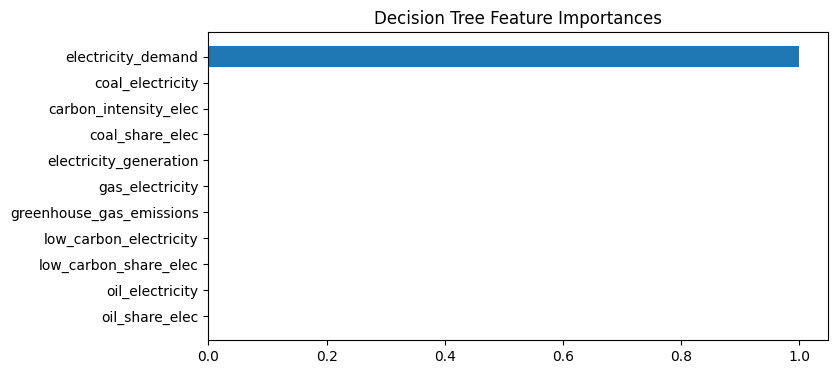


RandomForest Feature Importances:
                     Feature  Importance
3         electricity_demand    0.207364
6   greenhouse_gas_emissions    0.184401
1           coal_electricity    0.183392
4     electricity_generation    0.164083
7     low_carbon_electricity    0.129568
5            gas_electricity    0.061816
9            oil_electricity    0.037955
2            coal_share_elec    0.015253
10            oil_share_elec    0.007858
0      carbon_intensity_elec    0.004266
8      low_carbon_share_elec    0.004041


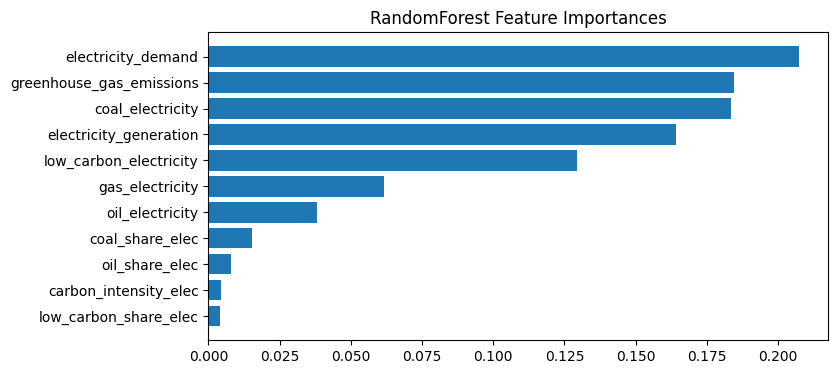


GradientBoost Feature Importances:
                     Feature  Importance
3         electricity_demand    0.456724
1           coal_electricity    0.296636
6   greenhouse_gas_emissions    0.197378
4     electricity_generation    0.024746
5            gas_electricity    0.009753
0      carbon_intensity_elec    0.004386
10            oil_share_elec    0.003803
7     low_carbon_electricity    0.003539
9            oil_electricity    0.001476
8      low_carbon_share_elec    0.000923
2            coal_share_elec    0.000637


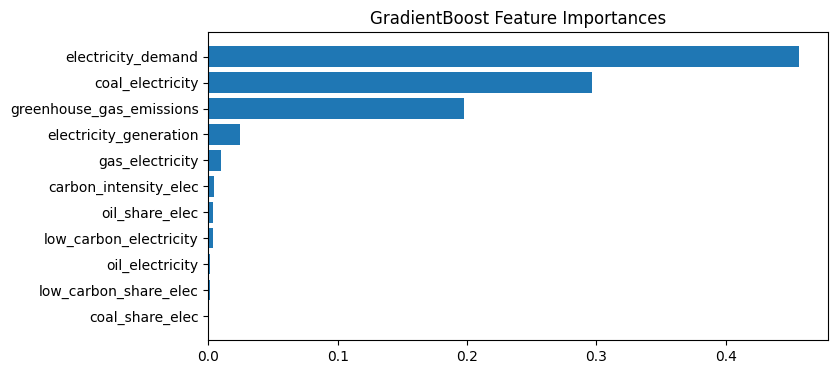


XGBoost Feature Importances:
                     Feature  Importance
3         electricity_demand    0.456230
1           coal_electricity    0.299956
6   greenhouse_gas_emissions    0.164268
8      low_carbon_share_elec    0.033740
5            gas_electricity    0.024315
0      carbon_intensity_elec    0.010983
4     electricity_generation    0.003391
9            oil_electricity    0.002678
2            coal_share_elec    0.001998
10            oil_share_elec    0.001794
7     low_carbon_electricity    0.000648


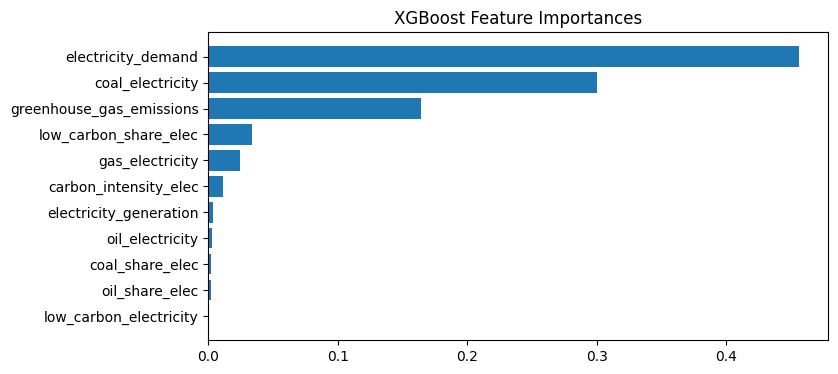


LightGBM Feature Importances:
                     Feature  Importance
10            oil_share_elec          71
0      carbon_intensity_elec          57
9            oil_electricity          56
4     electricity_generation          42
6   greenhouse_gas_emissions          41
8      low_carbon_share_elec          39
5            gas_electricity          35
3         electricity_demand          33
2            coal_share_elec          32
7     low_carbon_electricity          25
1           coal_electricity          14


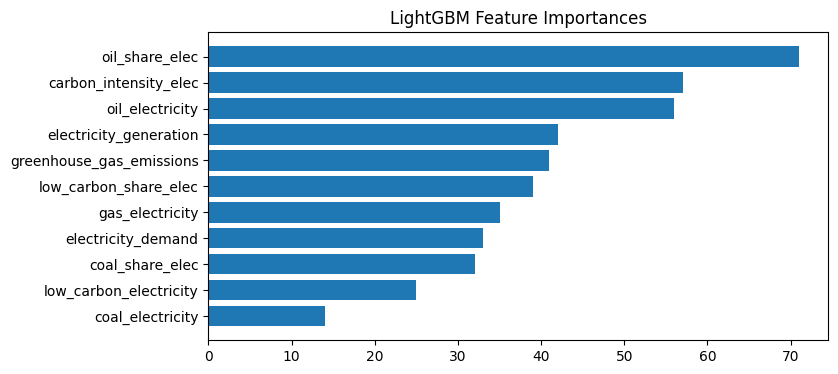

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances for tree-based models only
for name, model in model_dictionary.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_names = X_train.columns  # assuming X_train is a DataFrame

        # Put in DataFrame for easy handling
        feat_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values("Importance", ascending=False)

        print(f"\n{name} Feature Importances:")
        print(feat_imp)

        # Plot
        plt.figure(figsize=(8,4))
        plt.barh(feat_imp["Feature"], feat_imp["Importance"])
        plt.title(f"{name} Feature Importances")
        plt.gca().invert_yaxis()
        plt.show()



linear Model Coefficients:
                     Feature  Coefficient
6   greenhouse_gas_emissions    10.315996
7     low_carbon_electricity     5.415240
2            coal_share_elec     1.577040
5            gas_electricity     1.176968
3         electricity_demand     0.973826
10            oil_share_elec     0.962023
0      carbon_intensity_elec    -0.278466
8      low_carbon_share_elec    -1.279888
4     electricity_generation    -4.195569
1           coal_electricity    -4.757629
9            oil_electricity    -7.307816


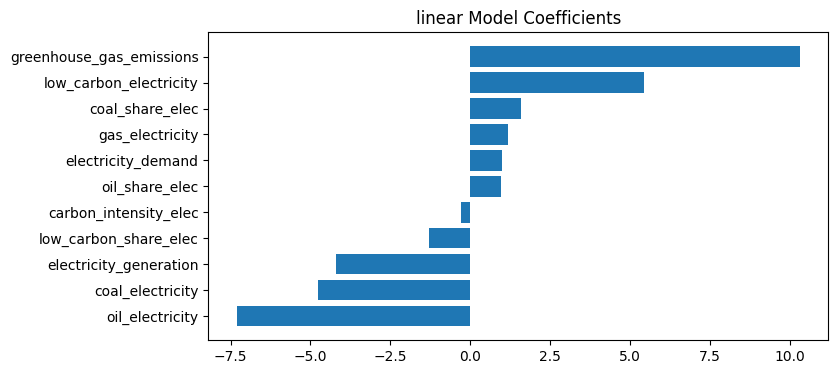


Lasso Coefficients:
                     Feature  Coefficient
6   greenhouse_gas_emissions     9.067255
2            coal_share_elec     2.275329
3         electricity_demand     2.157576
7     low_carbon_electricity     1.687633
10            oil_share_elec     1.245271
5            gas_electricity    -0.200805
0      carbon_intensity_elec    -0.324118
8      low_carbon_share_elec    -1.154814
4     electricity_generation    -2.851227
1           coal_electricity    -6.585585
9            oil_electricity    -9.113395


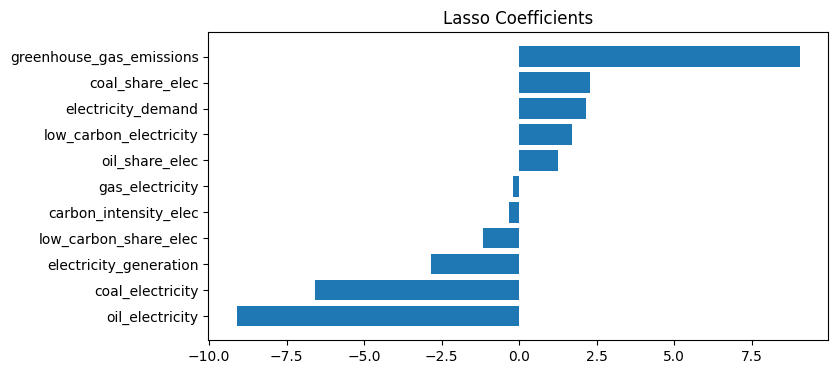


Ridge Coefficients:
                     Feature  Coefficient
6   greenhouse_gas_emissions    10.315976
7     low_carbon_electricity     5.415254
2            coal_share_elec     1.577031
5            gas_electricity     1.176982
3         electricity_demand     0.973836
10            oil_share_elec     0.962018
0      carbon_intensity_elec    -0.278464
8      low_carbon_share_elec    -1.279881
4     electricity_generation    -4.195589
1           coal_electricity    -4.757602
9            oil_electricity    -7.307783


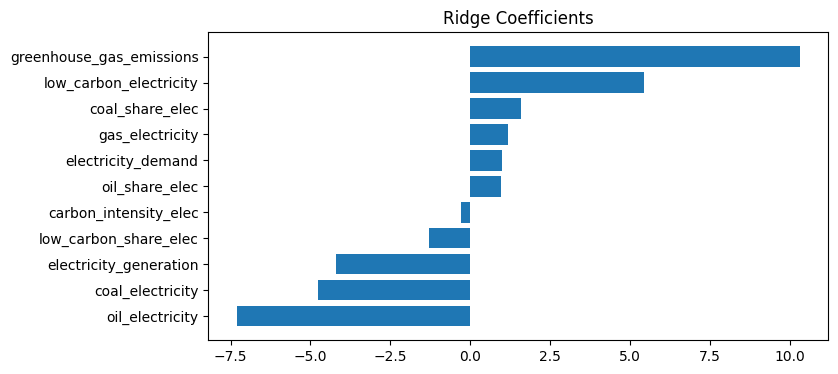

In [ ]:
for name, model in model_dictionary.items():
    if hasattr(model, "coef_"):
        coefs = model.coef_
        feature_names = X_train.columns

        coef_df = pd.DataFrame({
            "Feature": feature_names,
            "Coefficient": coefs
        }).sort_values("Coefficient", ascending=False)

        print(f"\n{name} Coefficients:")
        print(coef_df)

        plt.figure(figsize=(8,4))
        plt.barh(coef_df["Feature"], coef_df["Coefficient"])
        plt.title(f"{name} Coefficients")
        plt.gca().invert_yaxis()
        plt.show()


In [ ]:

standard_scaler =  StandardScaler()
standard_scaler.fit(df_num)

# transform data
df_num_scaled = standard_scaler.transform(df_num)

print(df_num_scaled)

[[-1.1932614  -0.17983232 -0.56397267 ... -0.35572866 -0.29074043
  -0.19660506]
 [-1.81777394 -0.17983232 -0.56397267 ... -0.36036064 -0.82651828
  -0.1977315 ]
 [ 0.41233018 -0.17983232 -0.56397267 ... -0.14763295 -0.66586209
  -0.03436061]
 ...
 [ 1.12742028 -0.17983232 -0.56397267 ... -0.12563634  1.5910208
  -0.19037654]
 [-1.71713394 -0.1784723  -0.47430276 ... -0.35276108 -0.84952668
  -0.19320683]
 [-0.33405759 -0.1649079   1.23579056 ... -0.36533428 -0.89440283
  -0.19230757]]


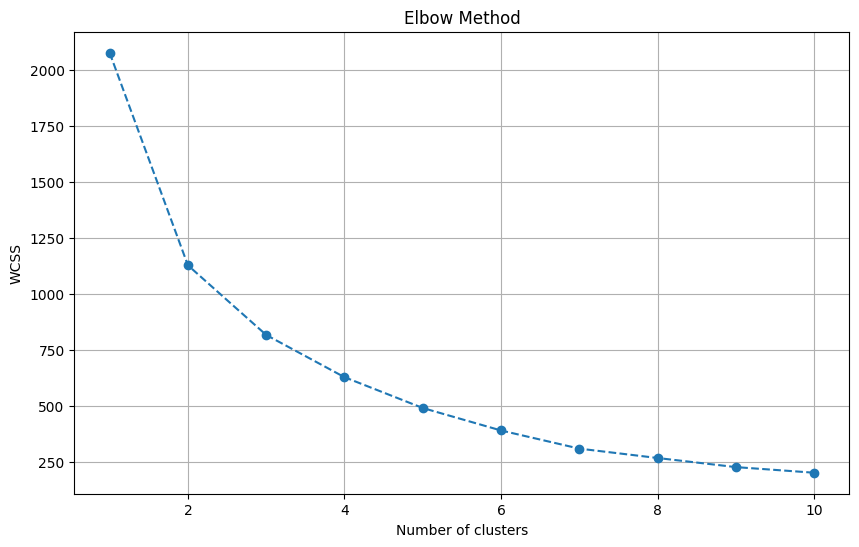

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_num_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

Clusters: 2, Silhouette Score: 0.8631
Clusters: 3, Silhouette Score: 0.2865
Clusters: 4, Silhouette Score: 0.3459
Clusters: 5, Silhouette Score: 0.3656
Clusters: 6, Silhouette Score: 0.3621
Clusters: 7, Silhouette Score: 0.3775
Clusters: 8, Silhouette Score: 0.3872
Clusters: 9, Silhouette Score: 0.3886
Clusters: 10, Silhouette Score: 0.3983


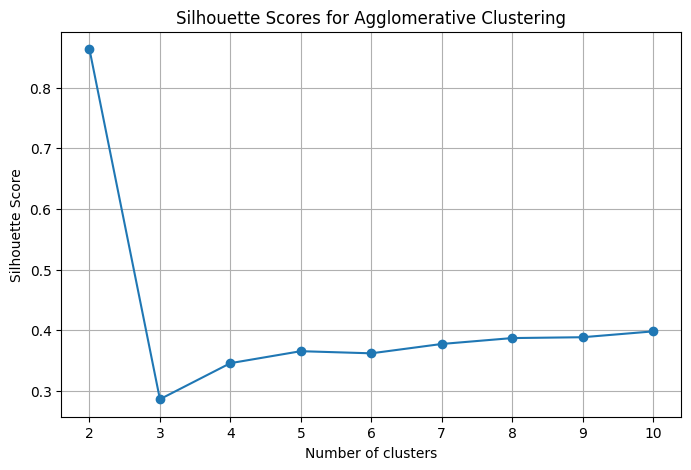

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# List to store silhouette scores
silhouette_scores = []

# Test cluster sizes from 2 to 10
for n_clusters in range(2, 11):
    # Initialize Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit and predict cluster labels
    labels = agg.fit_predict(df_num_scaled)  # df is your full dataset

    # Compute silhouette score
    score = silhouette_score(df_num_scaled, labels)
    silhouette_scores.append(score)
    print(f"Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Plot Silhouette scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Define clustering models inside a dictionary
clustering_models = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=4),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5)

}

# Fit models and get cluster labels
results = {}

for name, model in clustering_models.items():
    # fit_predict returns cluster labels directly
    labels = model.fit_predict(df_num_scaled)   # <-- X is your feature matrix (scaled is better!)

    results[name] = labels




In [ ]:

df_result = pd.DataFrame(results)
print(df_result)


     KMeans  Agglomerative  DBSCAN
0         0              2       0
1         0              2       0
2         4              3       1
3         0              3       0
4         4              3       2
..      ...            ...     ...
168       0              2      -1
169       0              0      -1
170       4              3       2
171       0              2       0
172       0              0      -1

[173 rows x 3 columns]


#BUILDING THE CLASSIFIER MODELS

In [ ]:
df_sca = pd.DataFrame(df_num_scaled,columns=num_var)

df_sca[['Cluster1','Cluster2','Cluster3']] = df_result


import matplotlib.pyplot as plt

# Assuming cluster_summary is now the mean values per cluster
df_summary = df_sca.groupby('Cluster1').agg({
       'electricity_demand':'mean',
       'coal_electricity':'mean',
      'carbon_intensity_elec':'mean',
            'coal_share_elec':'mean',
     'electricity_generation':'mean',
            'gas_electricity':'mean',
   'greenhouse_gas_emissions':'mean',
     'low_carbon_electricity':'mean',
      'low_carbon_share_elec':'mean',
            'oil_electricity':'mean',
            'oil_share_elec':'mean'
})



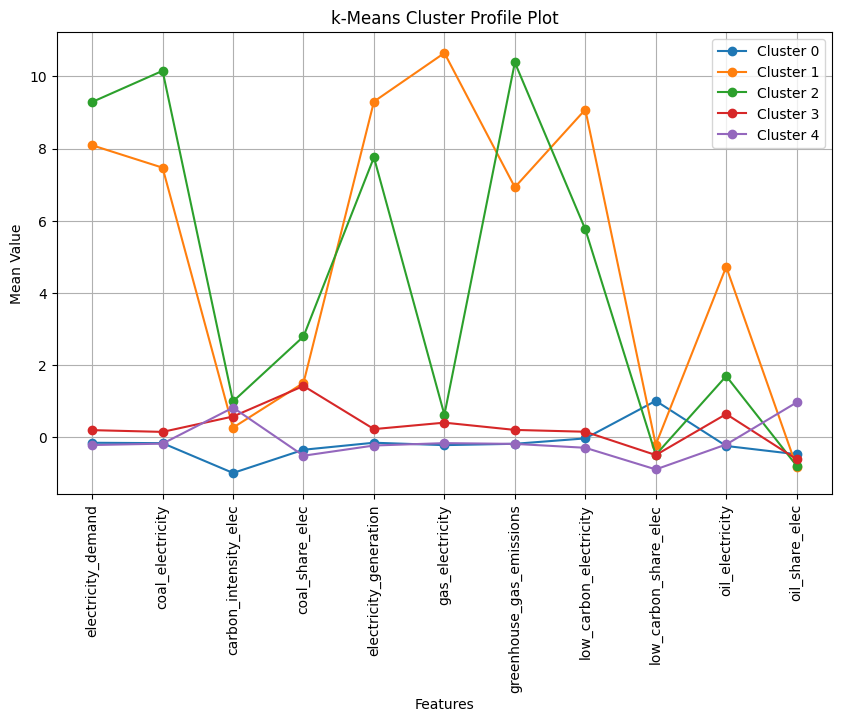

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in df_summary.index:
    plt.plot(df_summary.columns,
             df_summary.loc[cluster],
             marker='o',
             label=f'Cluster {cluster}')

plt.title('k-Means Cluster Profile Plot')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)  # Make x-axis labels horizontal
plt.legend()
plt.grid(True)
plt.show()


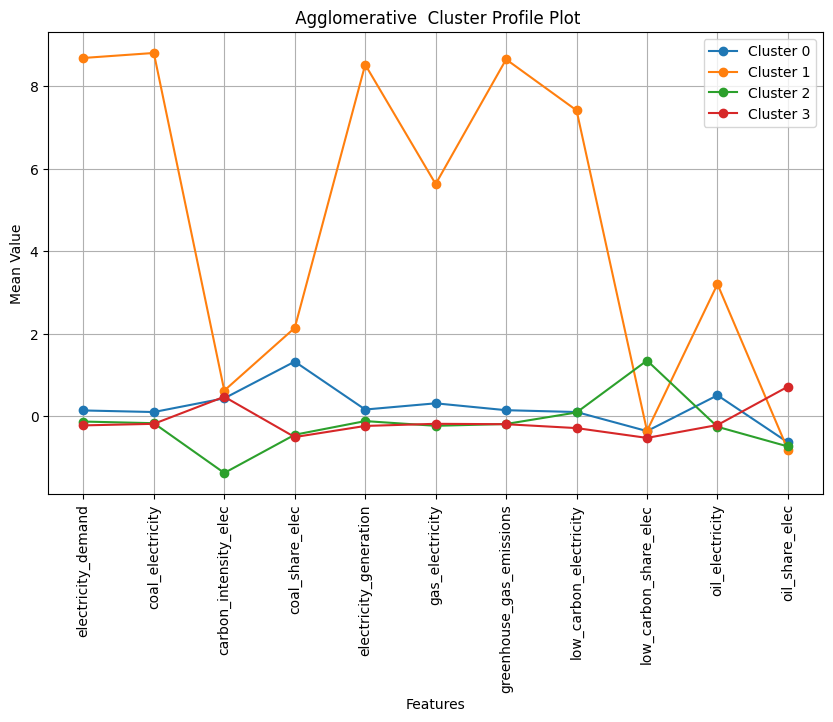

In [ ]:
df_sca = pd.DataFrame(df_num_scaled,columns=num_var)

df_sca[['Cluster1','Cluster2','Cluster3']] = df_result


import matplotlib.pyplot as plt

# Assuming cluster_summary is now the mean values per cluster
df_summary = df_sca.groupby('Cluster2').agg({
       'electricity_demand':'mean',
       'coal_electricity':'mean',
      'carbon_intensity_elec':'mean',
            'coal_share_elec':'mean',
     'electricity_generation':'mean',
            'gas_electricity':'mean',
   'greenhouse_gas_emissions':'mean',
     'low_carbon_electricity':'mean',
      'low_carbon_share_elec':'mean',
            'oil_electricity':'mean',
            'oil_share_elec':'mean'
})



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in df_summary.index:
    plt.plot(df_summary.columns,
             df_summary.loc[cluster],
             marker='o',
             label=f'Cluster {cluster}')

plt.title(' Agglomerative  Cluster Profile Plot')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)  # Make x-axis labels horizontal
plt.legend()
plt.grid(True)
plt.show()



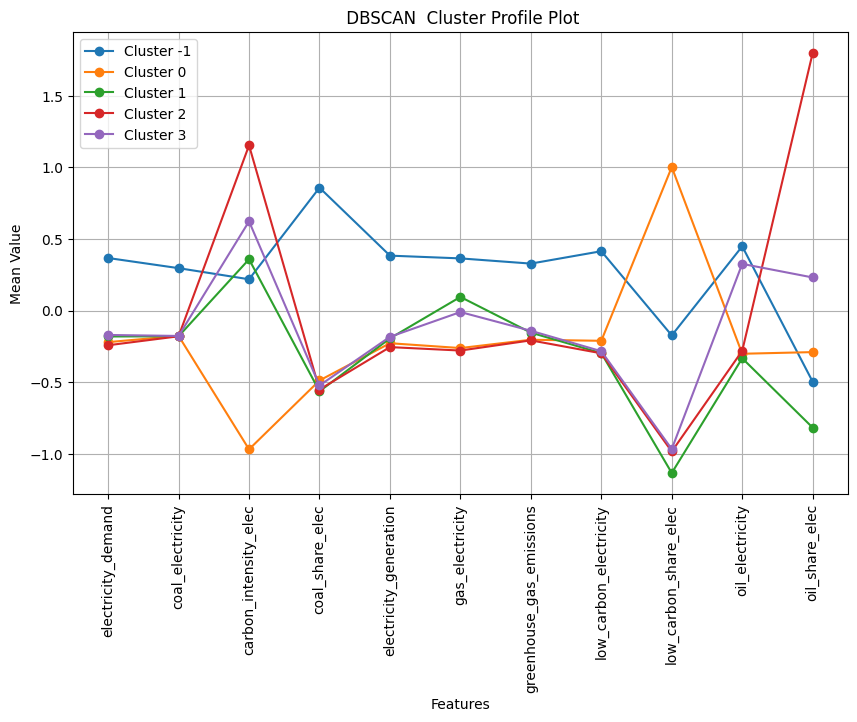

In [ ]:
df_sca = pd.DataFrame(df_num_scaled,columns=num_var)

df_sca[['Cluster1','Cluster2','Cluster3']] = df_result


import matplotlib.pyplot as plt

# Assuming cluster_summary is now the mean values per cluster
df_summary = df_sca.groupby('Cluster3').agg({
       'electricity_demand':'mean',
       'coal_electricity':'mean',
      'carbon_intensity_elec':'mean',
            'coal_share_elec':'mean',
     'electricity_generation':'mean',
            'gas_electricity':'mean',
   'greenhouse_gas_emissions':'mean',
     'low_carbon_electricity':'mean',
      'low_carbon_share_elec':'mean',
            'oil_electricity':'mean',
            'oil_share_elec':'mean'
})



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in df_summary.index:
    plt.plot(df_summary.columns,
             df_summary.loc[cluster],
             marker='o',
             label=f'Cluster {cluster}')

plt.title(' DBSCAN  Cluster Profile Plot')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)  # Make x-axis labels horizontal
plt.legend()
plt.grid(True)
plt.show()

